In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

   ### Data extraction:

In [2]:
#reading file from csv
auto_data = pd.read_csv('./Resources/adverts.csv')

In [3]:
# making a copy of the data and using only a sample of the data
a_data_copy = auto_data.copy().sample(n=5000, ignore_index=True)

# visualy inspecting data
print(a_data_copy.shape)
a_data_copy.head(15)

(5000, 12)


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202009073406619,66900.0,66,Grey,Audi,A3,USED,2016.0,13490,Hatchback,False,Petrol
1,202008303098379,27444.0,66,White,Citroen,C1,USED,2016.0,4875,Hatchback,False,Petrol
2,202009103542521,13226.0,69,Silver,SKODA,Octavia,USED,2019.0,14500,Hatchback,False,Diesel
3,202005039159319,5998.0,69,Multicolour,Audi,A5 Cabriolet,USED,2020.0,28851,Convertible,False,Diesel
4,202009193943005,71000.0,63,Blue,Hyundai,ix35,USED,2013.0,7000,SUV,False,Diesel
5,202008052129622,103000.0,09,Blue,Honda,Jazz,USED,2009.0,2395,Hatchback,False,Petrol
6,202009013181166,92689.0,10,White,Fiat,500,USED,2010.0,2490,Hatchback,False,Diesel
7,202010134938778,37697.0,18,Blue,Volvo,V40,USED,2018.0,13700,Hatchback,False,Petrol
8,202008192693636,34000.0,16,Grey,Peugeot,3008,USED,2016.0,9200,SUV,False,Diesel
9,202010165059424,43347.0,63,Black,Vauxhall,Insignia,USED,2013.0,8990,Hatchback,False,Diesel


### Data exploration:

In [4]:
# Data Types of the columns
a_data_copy.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [5]:
#finding all null or nan values in data
a_data_copy.isnull().sum()

public_reference           0
mileage                    0
reg_code                 399
standard_colour           63
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration     423
price                      0
body_type                  7
crossover_car_and_van      0
fuel_type                  4
dtype: int64

In [6]:
#checking to see if there are any duplicate rows
a_data_copy.public_reference.duplicated().sum()

0

In [7]:
#checking the values in each column
for column in a_data_copy.columns:
    print(a_data_copy[column].value_counts())

202009073406619    1
202010175110871    1
202009123632678    1
202010175103064    1
202010134967932    1
                  ..
202009093500431    1
202003208639333    1
202007241633607    1
202009173855428    1
202010305596173    1
Name: public_reference, Length: 5000, dtype: int64
0.0         212
10.0        164
60000.0      25
5.0          25
40000.0      20
           ... 
131143.0      1
11295.0       1
14103.0       1
44792.0       1
17850.0       1
Name: mileage, Length: 3253, dtype: int64
17    475
67    417
69    326
66    307
18    275
16    242
68    204
19    200
65    185
20    169
15    161
64    155
14    149
70    137
63    122
13    119
61     96
62     90
12     87
10     75
59     71
11     67
60     62
09     55
08     53
07     39
57     37
56     30
58     28
05     25
06     21
54     19
04     19
55     15
03     11
52      9
02      7
Y       7
W       7
53      5
X       5
51      4
P       3
F       2
R       2
E       1
S       1
N       1
G       1
M       1


#### Based on initial visual analysis the next step is to select a subset of features of intrest and perform further analsis

In [8]:
data_subset = a_data_copy[['mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'crossover_car_and_van',
       'fuel_type','price']]

data_subset.head(10)

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,price
0,66900.0,66,Grey,Audi,A3,USED,2016.0,Hatchback,False,Petrol,13490
1,27444.0,66,White,Citroen,C1,USED,2016.0,Hatchback,False,Petrol,4875
2,13226.0,69,Silver,SKODA,Octavia,USED,2019.0,Hatchback,False,Diesel,14500
3,5998.0,69,Multicolour,Audi,A5 Cabriolet,USED,2020.0,Convertible,False,Diesel,28851
4,71000.0,63,Blue,Hyundai,ix35,USED,2013.0,SUV,False,Diesel,7000
5,103000.0,09,Blue,Honda,Jazz,USED,2009.0,Hatchback,False,Petrol,2395
6,92689.0,10,White,Fiat,500,USED,2010.0,Hatchback,False,Diesel,2490
7,37697.0,18,Blue,Volvo,V40,USED,2018.0,Hatchback,False,Petrol,13700
8,34000.0,16,Grey,Peugeot,3008,USED,2016.0,SUV,False,Diesel,9200
9,43347.0,63,Black,Vauxhall,Insignia,USED,2013.0,Hatchback,False,Diesel,8990


In [9]:
# get quantitative features
quant_features = data_subset.select_dtypes(include=['int64', 'float64'])

# get qualitative features
qual_features = data_subset.select_dtypes(exclude=['int64', 'float64'])
#quant_features["price"] = np.log(quant_features["price"])
#quant_features["price"] = quant_features["price"].astype(float)
#quant_features["price"].describe()



### Quantitative data subset analysis for exploration

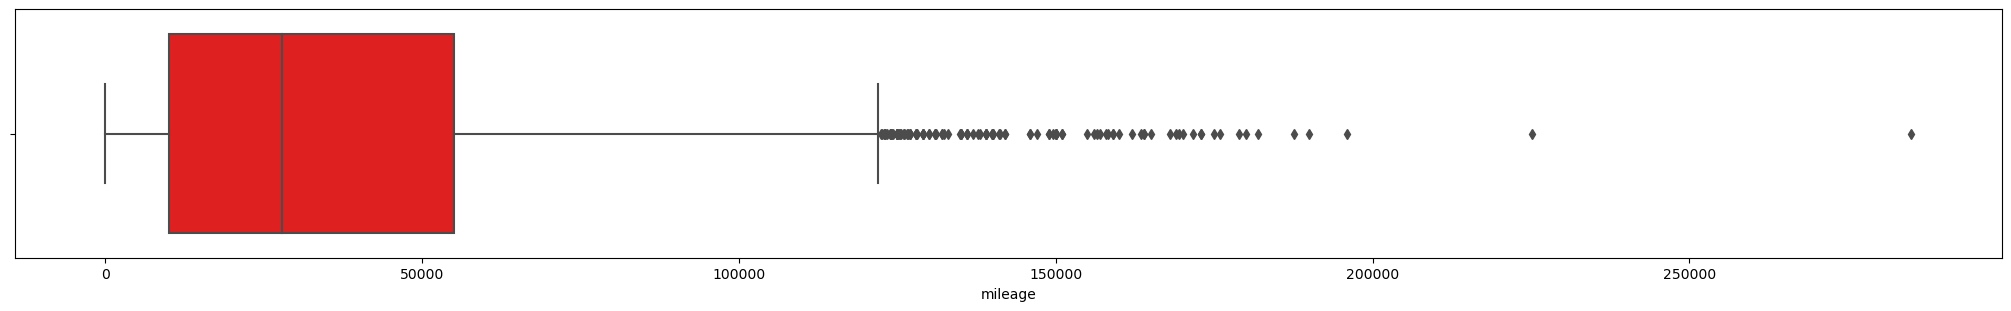

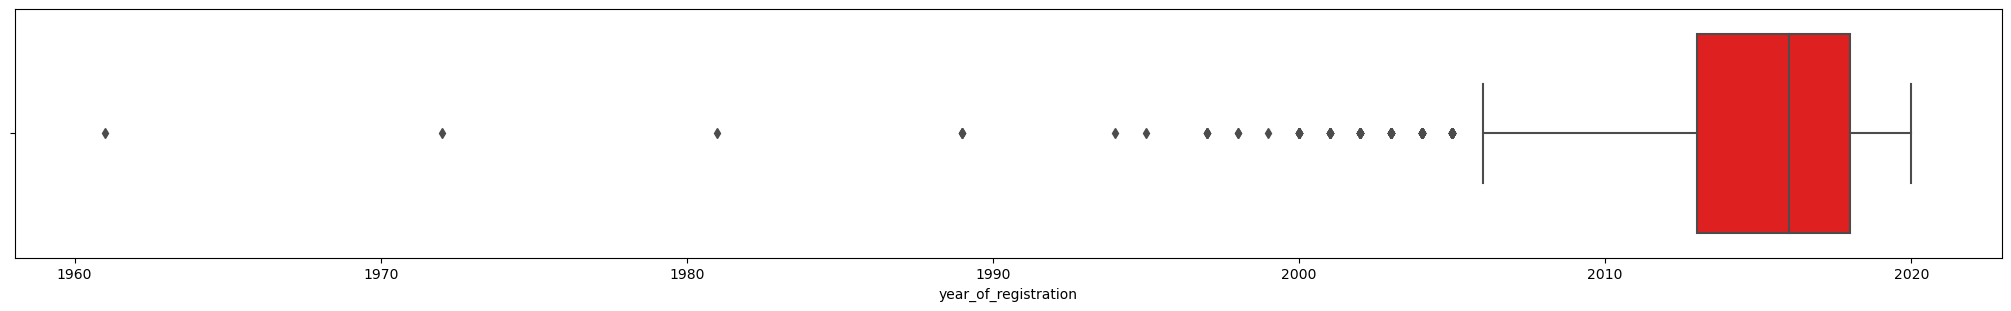

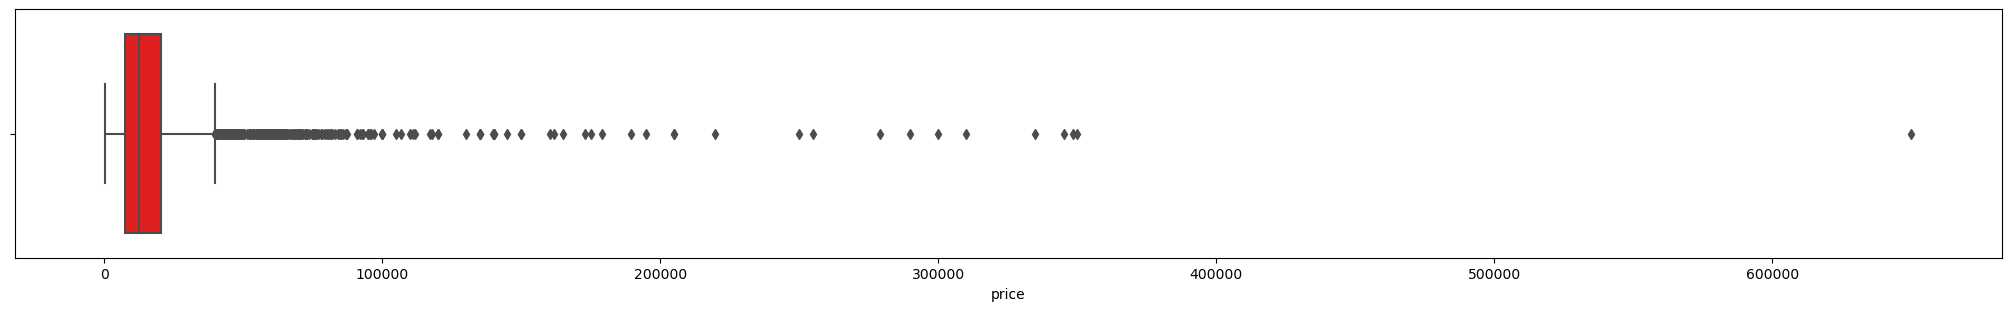

In [10]:
# Pre Quantitative data outlier handling
for col in quant_features:
    fig, ax =plt.subplots(1, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.boxplot(data =quant_features[col], x=quant_features[col],  color='red')
    #plt.suptitle(f'{col.title()} (before handling outliers)',weight='bold')

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'year_of_registration'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

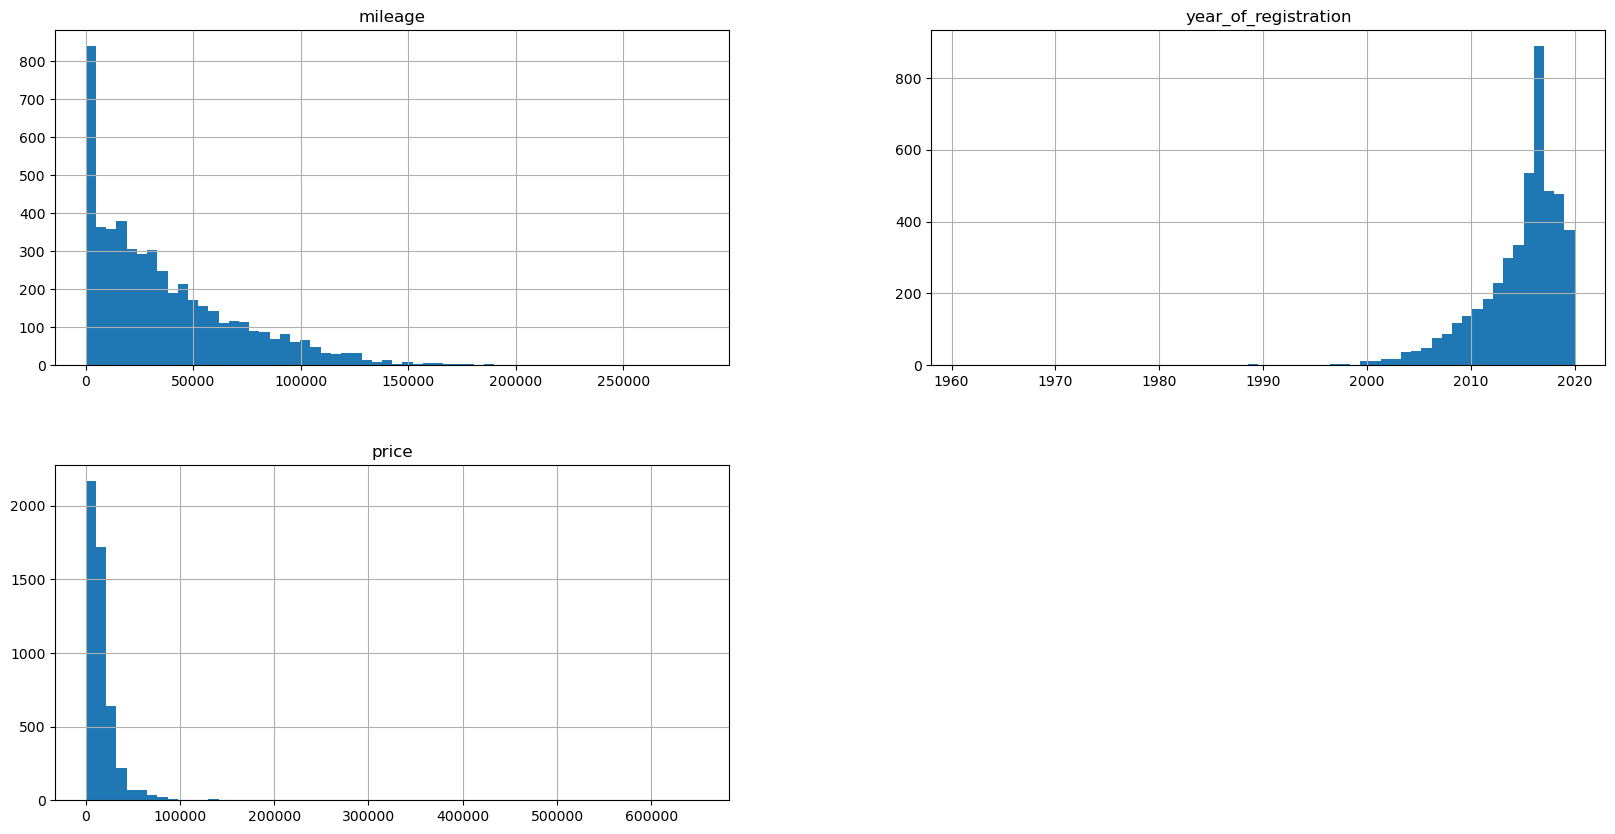

In [11]:
quant_features.hist(bins=60, figsize=(20,10))

In [12]:
# Checking percentage of outliers in quantitative subset
def outlier_prcnt(data):
    for col_name in data.columns:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        
        outliers = ((data[col_name] > fence_high) | (data[col_name] < fence_low)).sum()
        total = data[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

outlier_prcnt(quant_features)

Total outliers in mileage are: 117 - 2.34%.
Total outliers in year_of_registration are: 144 - 2.88%.
Total outliers in price are: 308 - 6.16%.


In [13]:
# Checking cleaning outliers in quantitative subset
def outlier_handle(data):
    df_new = data.copy()
    for col_name in data.columns:
        if col_name == "mileage" or col_name == "price":
            q1 = data[col_name].quantile(0.25)
            q3 = data[col_name].quantile(0.75)
            iqr = q3-q1  #IQR
            fence_low  = q1-1.5*iqr
            fence_high = q3+1.5*iqr
            df_new.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                             np.where(data[col_name]< fence_low, fence_low,
                                                      data[col_name]))
    return df_new
quant_features = outlier_handle(quant_features)

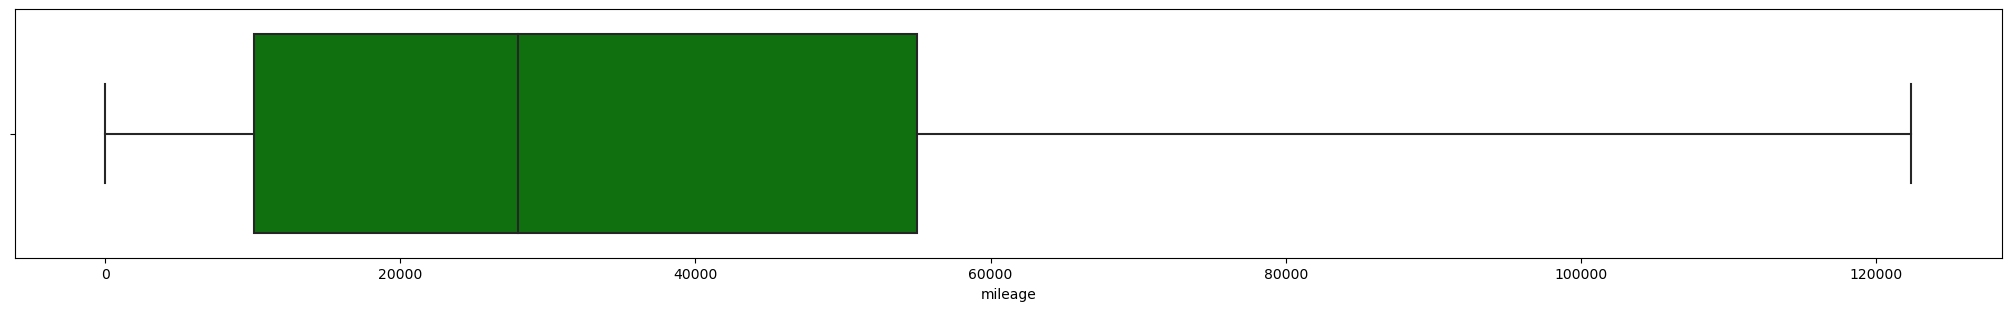

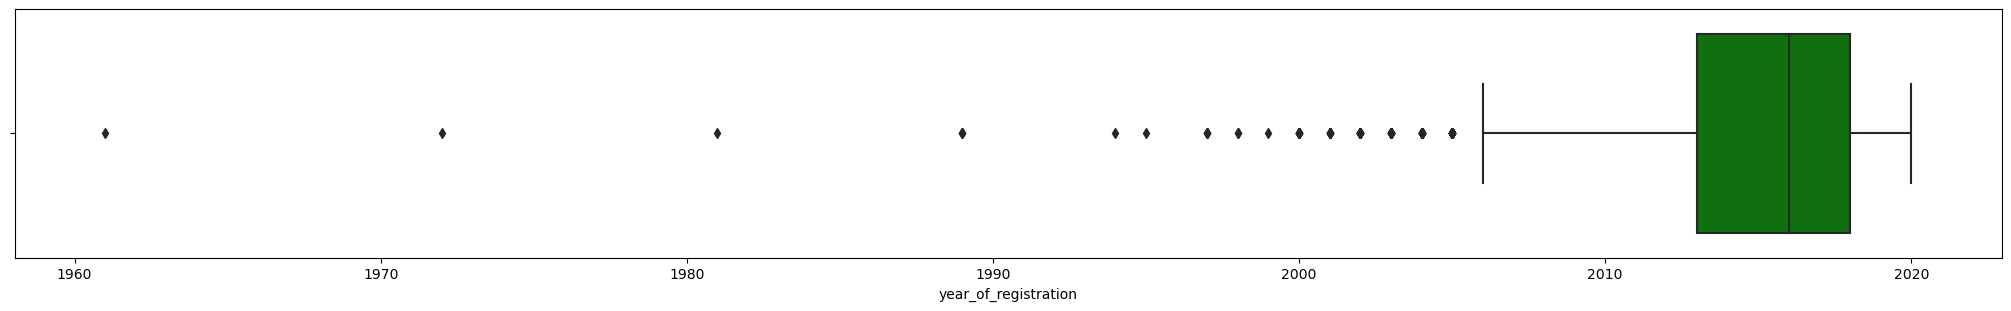

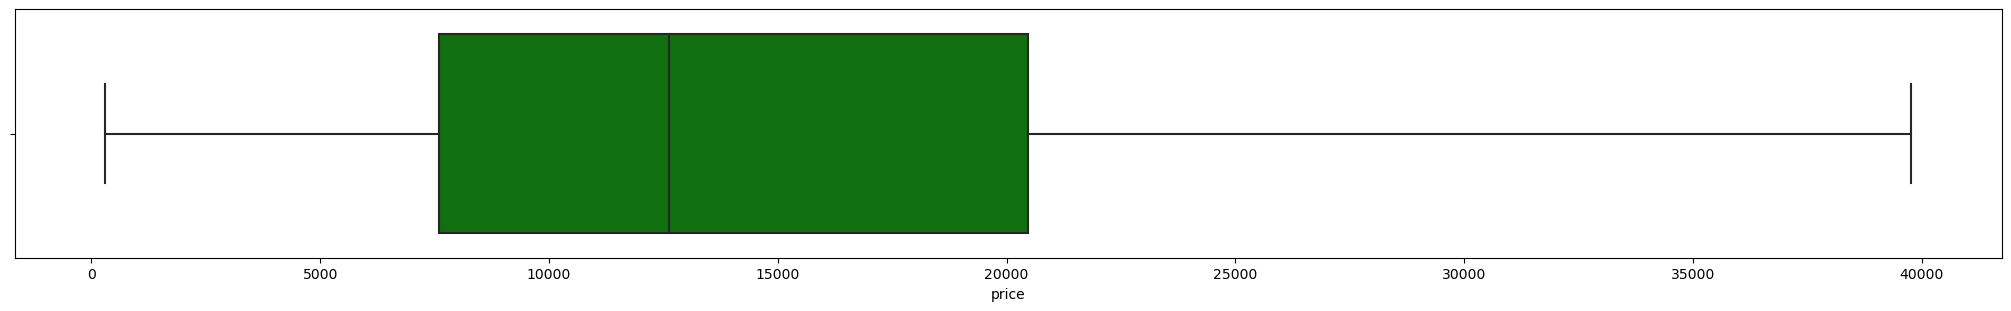

In [14]:
#  Post Quantitative data outlier handling
for col in quant_features:
    fig, ax =plt.subplots(1, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.boxplot(data =quant_features[col], x=quant_features[col],  color='green')
    #plt.suptitle(f'{col.title()} (before handling outliers)',weight='bold')

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'year_of_registration'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

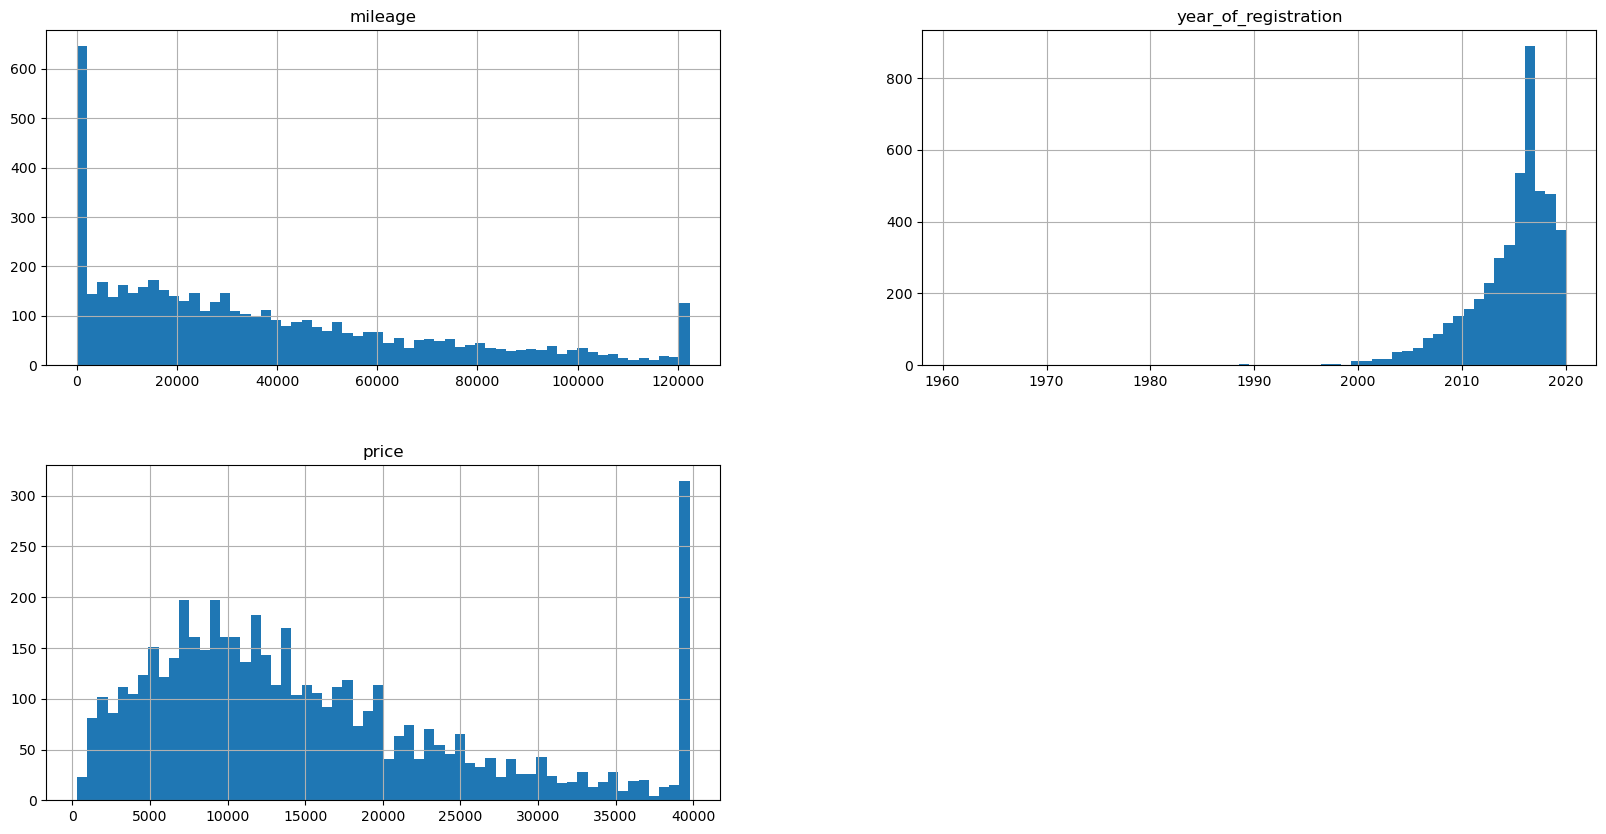

In [15]:
# checking outliers in quantitative features
quant_features.hist(bins=60, figsize=(20,10))

In [16]:
quant_features.describe()

,mileage,year_of_registration,price
count,5000.000000,4577.000000,5000.000000
mean,36434.368625,2015.159056,15284.120900
std,32637.263157,4.183828,10310.032954
min,0.000000,1961.000000,300.000000
25%,10076.250000,2013.000000,7600.000000
50%,27973.500000,2016.000000,12628.000000
75%,55000.000000,2018.000000,20467.750000
max,122385.625000,2020.000000,39769.375000


### Qualitative data subset analysis for exploration

In [17]:
qual_features.columns

Index(['reg_code', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type'],
      dtype='object')

In [18]:

price = quant_features["price"]
qual_features_subset = qual_features.drop(columns='reg_code')
qual_features_subset.head(15)

,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type
0,Grey,Audi,A3,USED,Hatchback,False,Petrol
1,White,Citroen,C1,USED,Hatchback,False,Petrol
2,Silver,SKODA,Octavia,USED,Hatchback,False,Diesel
3,Multicolour,Audi,A5 Cabriolet,USED,Convertible,False,Diesel
4,Blue,Hyundai,ix35,USED,SUV,False,Diesel
5,Blue,Honda,Jazz,USED,Hatchback,False,Petrol
6,White,Fiat,500,USED,Hatchback,False,Diesel
7,Blue,Volvo,V40,USED,Hatchback,False,Petrol
8,Grey,Peugeot,3008,USED,SUV,False,Diesel
9,Black,Vauxhall,Insignia,USED,Hatchback,False,Diesel


In [22]:
# converting categorical values to type string to improve visualisation of data
for col in qual_features_subset.columns:
     qual_features_subset[col] = qual_features_subset[col].astype(str)
qual_features_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   standard_colour        5000 non-null   object
 1   standard_make          5000 non-null   object
 2   standard_model         5000 non-null   object
 3   vehicle_condition      5000 non-null   object
 4   body_type              5000 non-null   object
 5   crossover_car_and_van  5000 non-null   object
 6   fuel_type              5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


In [56]:
# finding the total amount of unique categorical values
for col in qual_features_subset:
    amount_unique = len(qual_features_subset[col].unique())
    print(f"feature:{col} total:{amount_unique} \n" )
    

feature:standard_colour total:22 

feature:standard_make total:53 

feature:standard_model total:468 

feature:vehicle_condition total:2 

feature:body_type total:13 

feature:crossover_car_and_van total:2 

feature:fuel_type total:9 



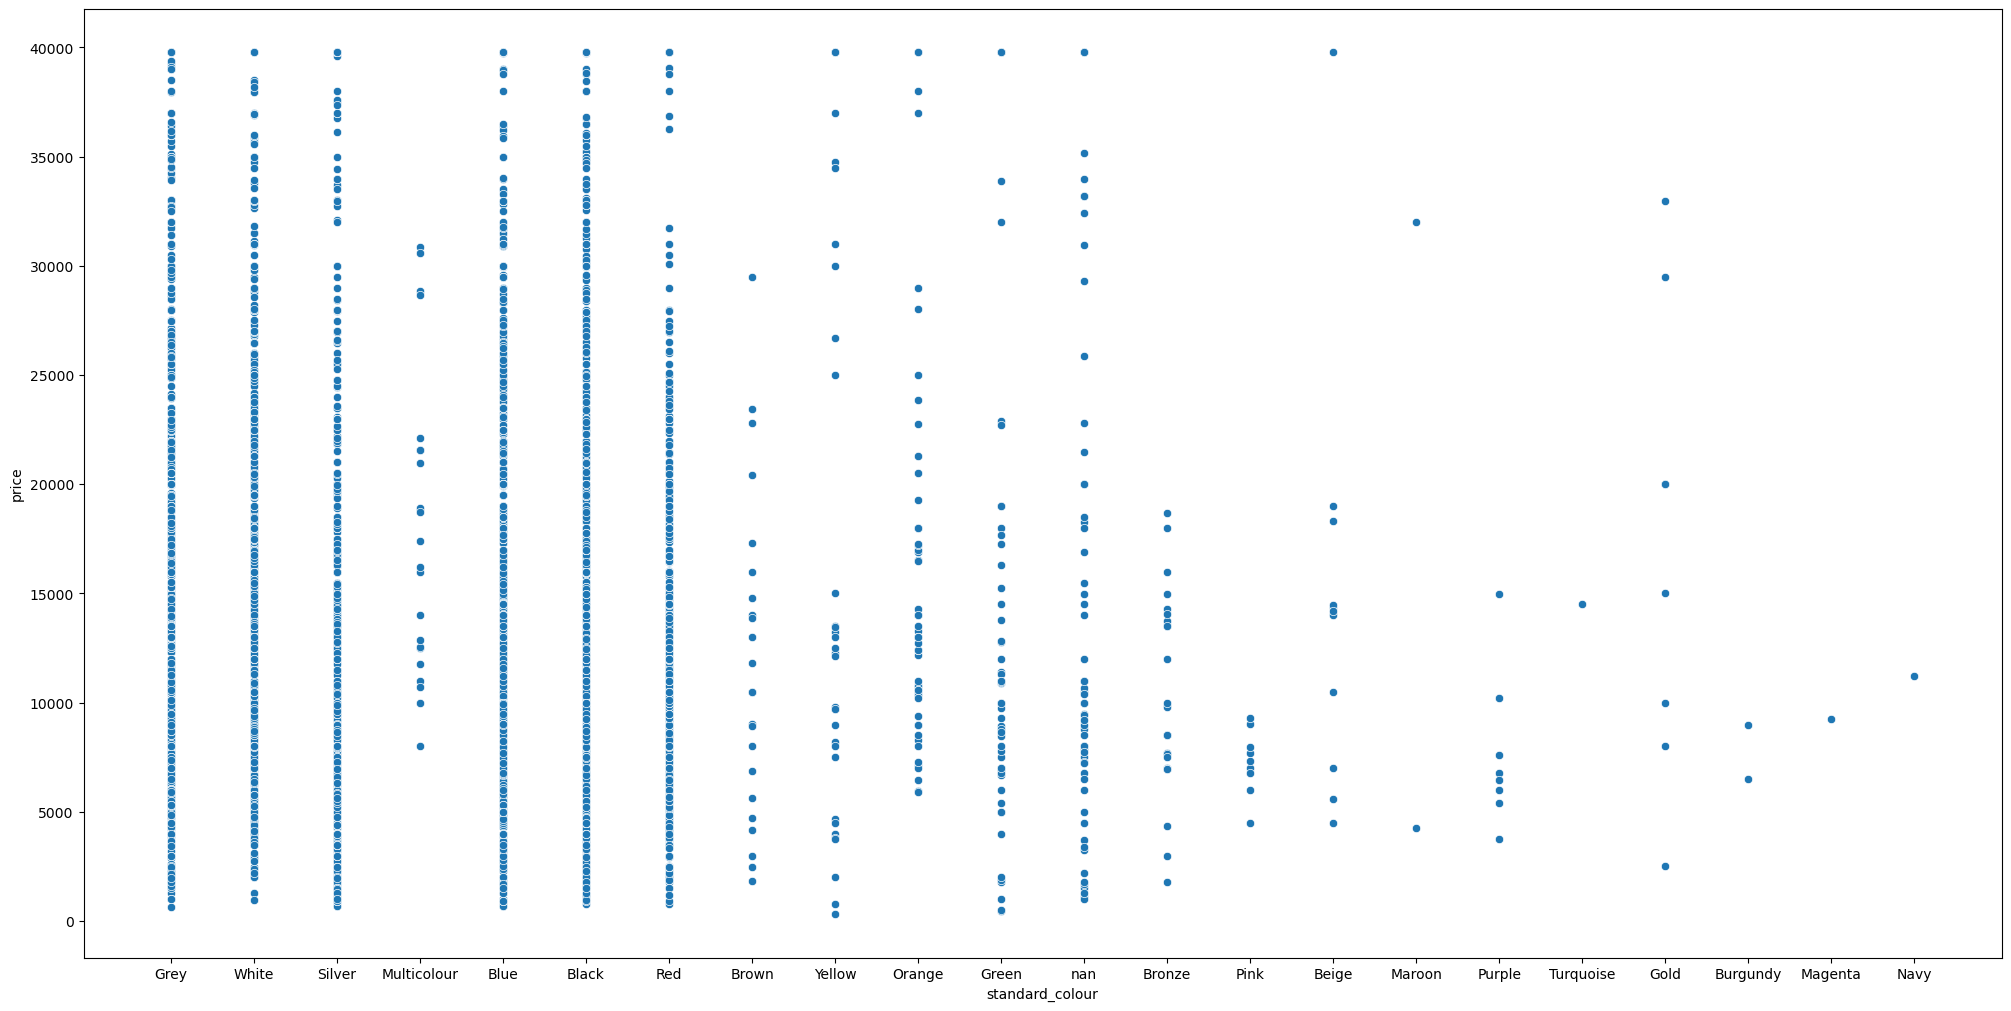

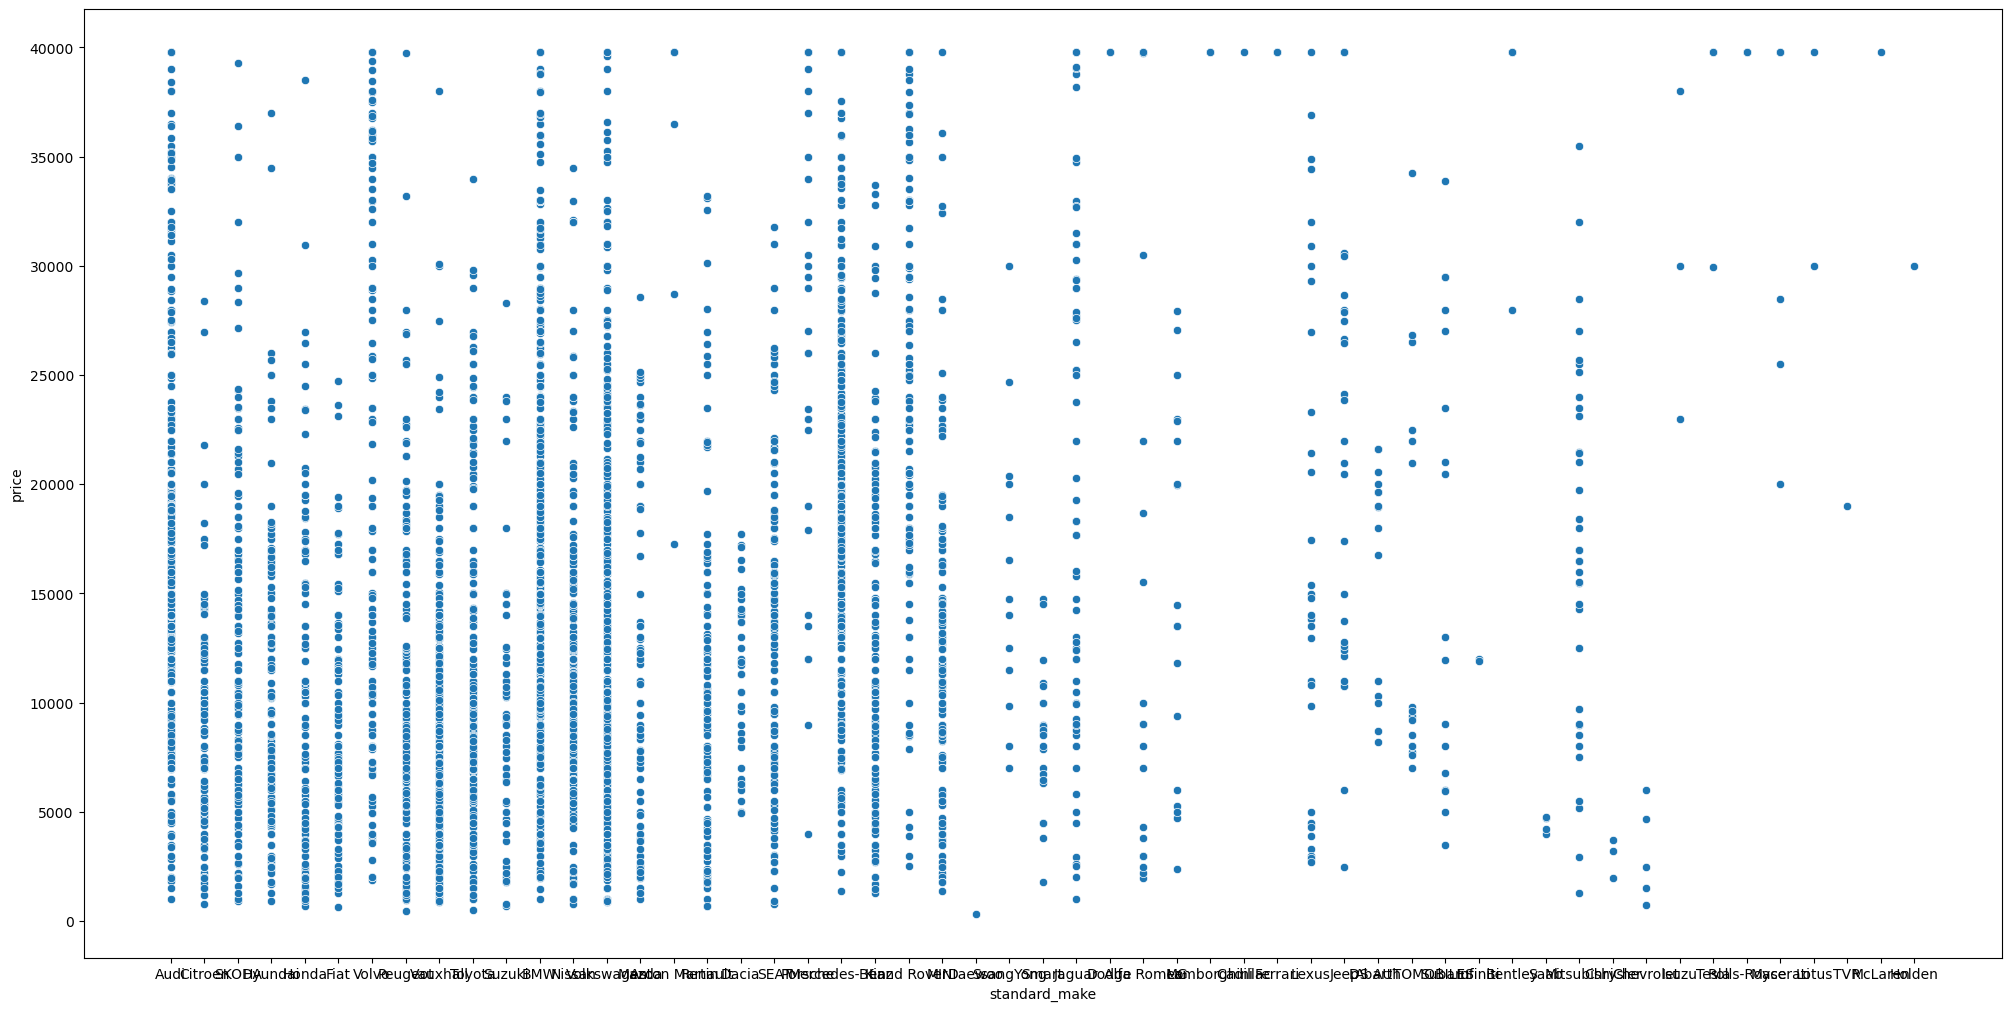

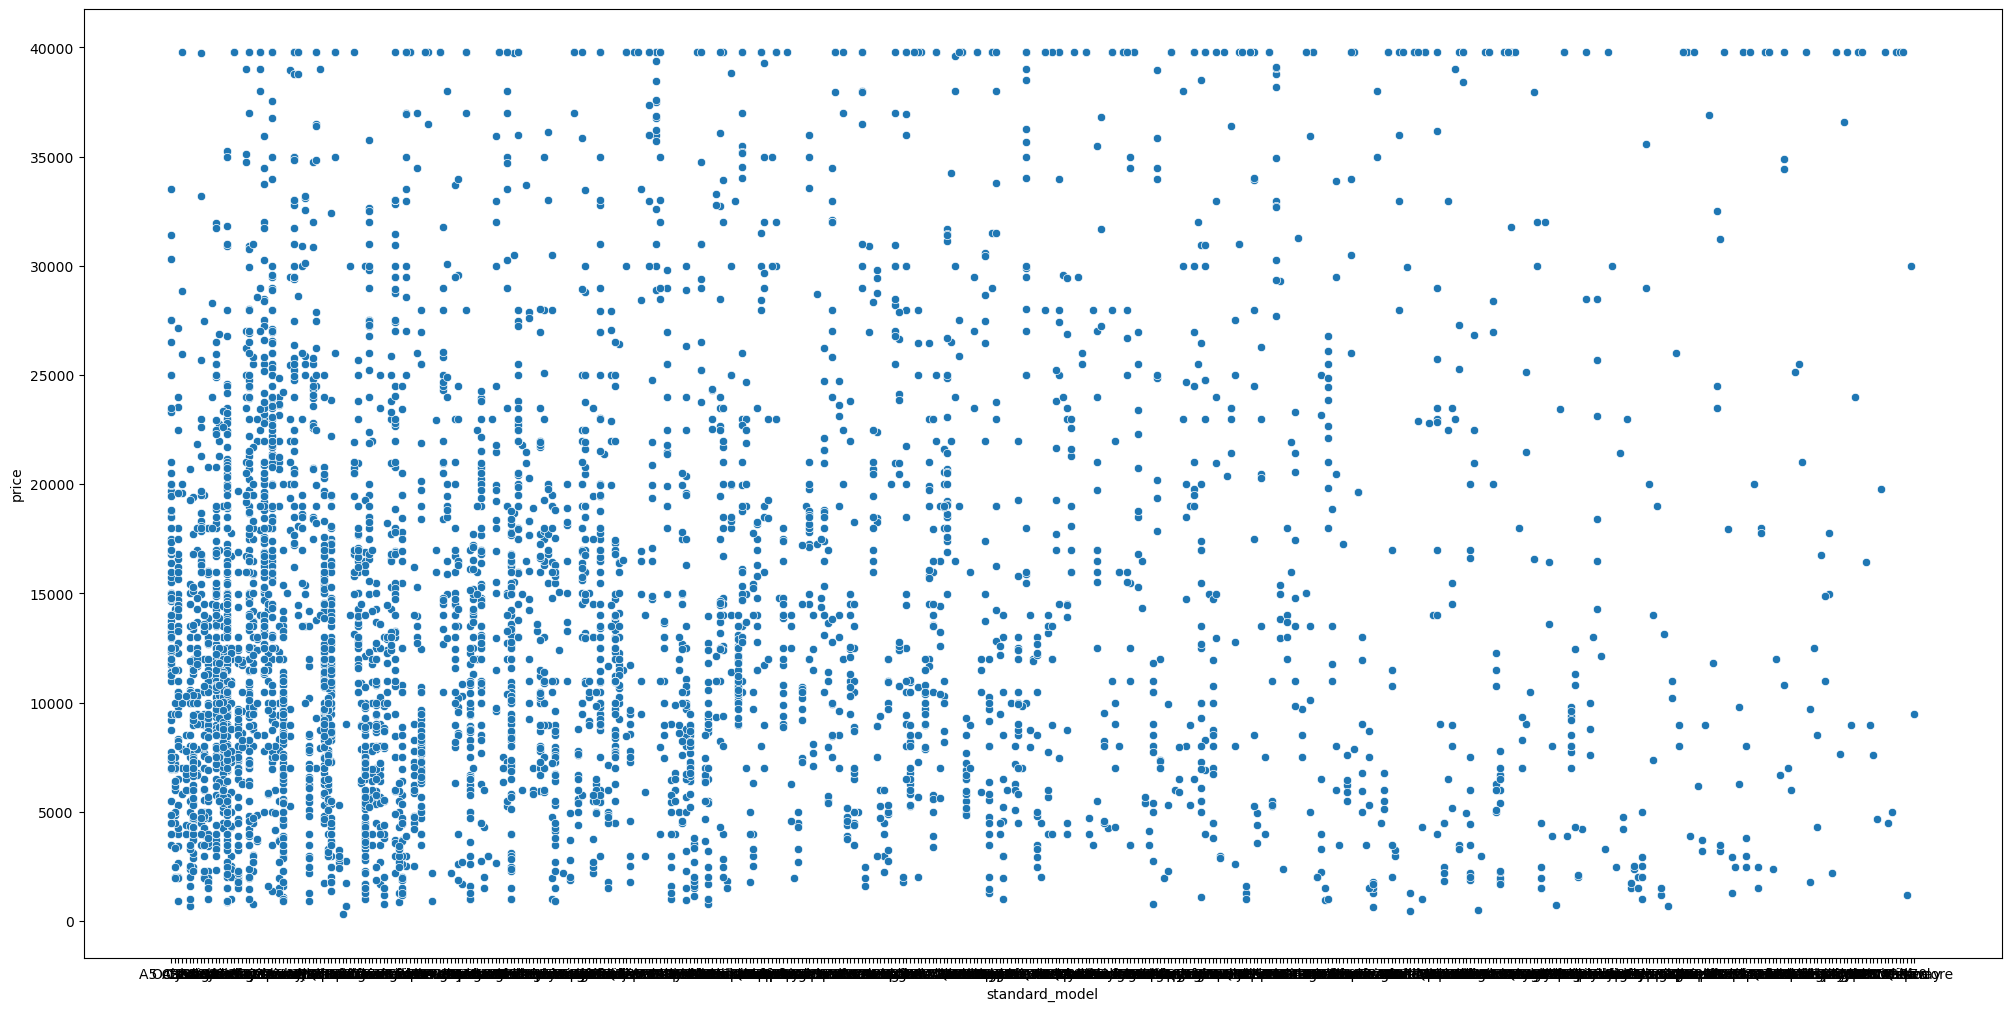

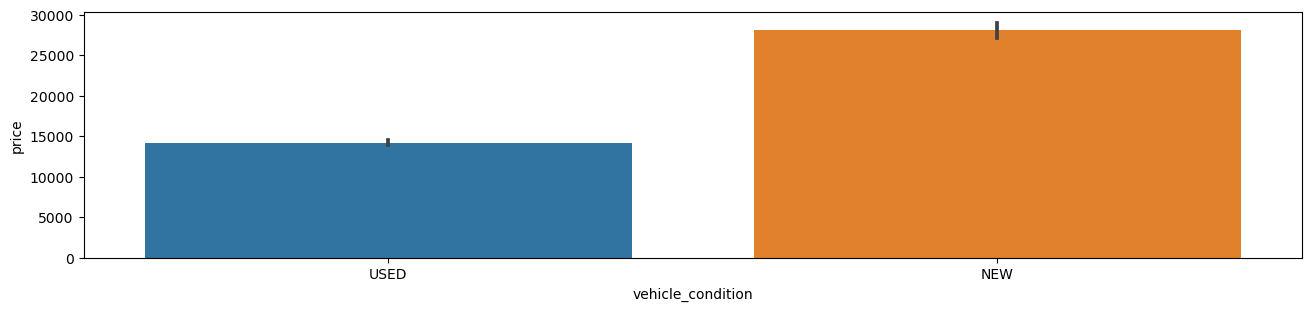

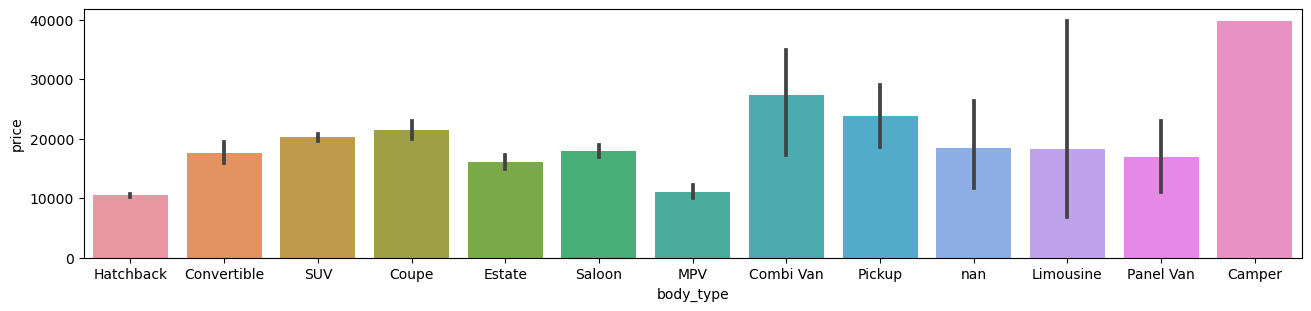

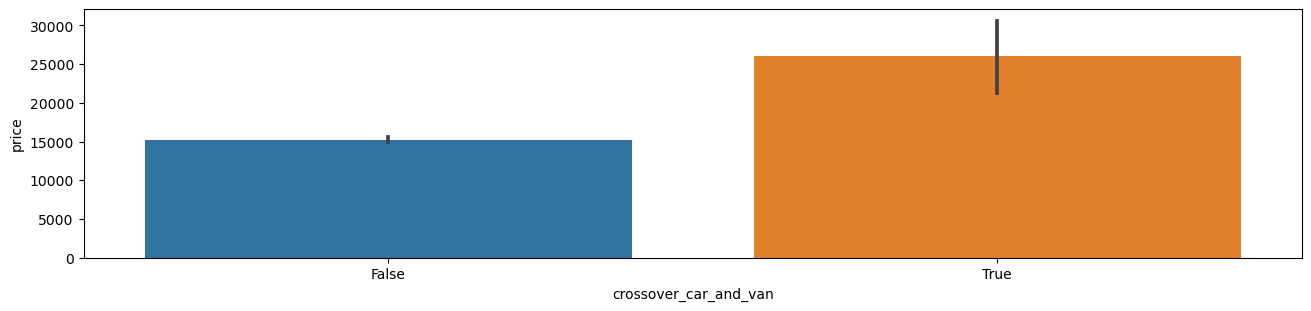

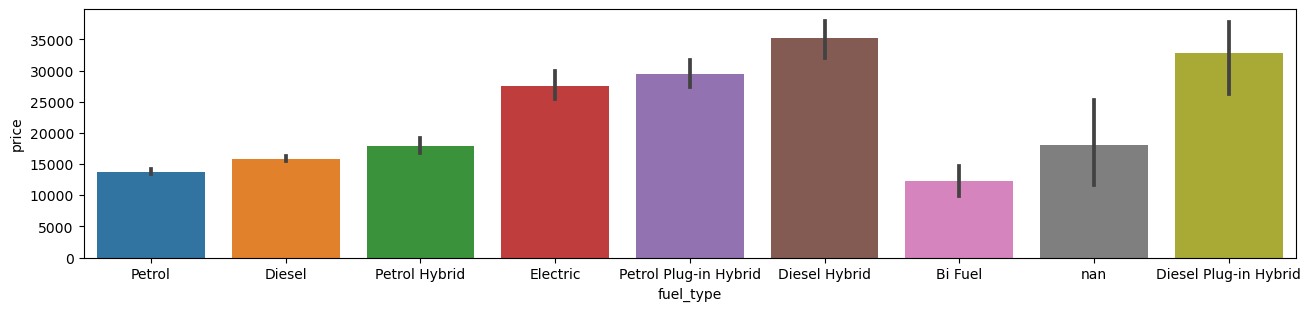

In [54]:
# visualizing categorical data in comparison to price
for col in qual_features_subset:
    amount_unique = len(qual_features_subset[col].unique())
    fig, ax =plt.subplots(1, constrained_layout=True)
    if not col == "price":
        if amount_unique <= 13:
            fig.set_size_inches(13, 3)
            sns.barplot(data=qual_features_subset, y=price, x=col)
        else:
            fig.set_size_inches(20, 10)
            sns.scatterplot(data=qual_features_subset, y=price, x=col)

In [ ]:
#data_subset[data_subset["year_of_registration"]<= 2000]
#a_data_copy[a_data_copy["price"]<= 17316]
#a_data_copy[a_data_copy["mileage"]>= 200000]
#quant_features["mileage"].describe()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt 
# plt.figure(figsize=(10, 10))
# sns.set(font_scale=.9)
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
# plt.show()

In [ ]:
#np.log10(quant_features["price"]).hist(bins=60, figsize=(20,10))


> During the initial observation of the data, multiple inconsistency such as ** NAN ** values were discovered
>
> as well as colums with mixed types. Valuable insights into the data was gained.

In [ ]:
# converting NAN values in each column into mean or mode of the column
# data_col = a_data_copy.columns
# for header in data_col:
#     dc = a_data_copy[header]
#     if a_data_copy[header].dtypes =='O':
#         dc_m = dc.fillna(a_data_copy[header].mode().iloc[0])
#     else:
#         dc_m = dc.fillna(value = a_data_copy[header].mean())
#     a_data_copy.update({header: dc_m})
    
# a_data_copy.isnull().sum()